### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:

1 Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

2 Calcola la media del consumo di birra, vino, e distillati

3 Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

4 Trova il paese con il valore massimo di alcohol_index

5 Filtra solo i paesi che consumano più di 100 birre all’anno

6 Crea un bar chart dei 10 paesi con più consumo totale  (total_litres_of_pure_alcohol)

7 Crea un line plot con wine_servings ordinato per paese (usa sort_values)

PUNTO 1: VISUALIZZO I PRIMI 10 PAESI (DAL PIU' ALTO)

In [ ]:
import pandas as pd

# Carico il dataset
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

# Ordino i paesi per consumo totale di alcol
top_10_alcol = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)

# Visualizzo i primi 10 paesi
print(top_10_alcol[['country', 'total_litres_of_pure_alcohol']])


                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
155            Slovakia                          11.4
99           Luxembourg                          11.4


PUNTO 2: CALCOLARE LA MEDIA DEL CONSUMO DI BIRRA, VINO E DISTILLATI

In [ ]:
# Calcolo la media per birra, vino e distillati
media_birra = round(df['beer_servings'].mean(), 2)
media_vino = round(df['wine_servings'].mean(), 2)
media_distillati = round(df['spirit_servings'].mean(), 2)

# Stampo i risultati
print(f"Media del consumo di birra: {media_birra}")
print(f"Media del consumo di vino: {media_vino}")
print(f"Media del consumo di distillati: {media_distillati}")

Media del consumo di birra: 106.16
Media del consumo di vino: 49.45
Media del consumo di distillati: 80.99


PUNTO 3: CREARE UNA NUOVA COLONNA CHIAMATA alcohol_index

In [4]:
# Creo la nuova colonna alcohol_index
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3

# Visualizzo i primi dati per verificare la colonna
print(df[['country', 'alcohol_index']].head())


       country  alcohol_index
0  Afghanistan       0.000000
1      Albania      91.666667
2      Algeria      13.000000
3      Andorra     231.666667
4       Angola     106.333333


PUNTO 4: TROVARE IL PAESE CON IL VALORE MASSIMO DI alcohol_index

In [5]:
# Trovo il paese con il valore massimo di alcohol_index
paese_max_index = df.loc[df['alcohol_index'].idxmax()]

# Stampo il paese con il massimo alcohol_index
print(f"Il paese con il massimo alcohol_index è: {paese_max_index['country']}")


Il paese con il massimo alcohol_index è: Andorra


PUNTO 5: FILTRARE SOLO I PAESI CHE CONSUMANO PIU' DI 100 BIRRE ALL'ANNO

In [6]:
# Filtrao i paesi che consumano più di 100 birre all'anno
paesi_birra_100 = df[df['beer_servings'] > 100]

# Visualizzo i paesi filtrati
print(paesi_birra_100[['country', 'beer_servings']])


               country  beer_servings
3              Andorra            245
4               Angola            217
5    Antigua & Barbuda            102
6            Argentina            193
8            Australia            261
..                 ...            ...
182     United Kingdom            219
184                USA            249
185            Uruguay            115
188          Venezuela            333
189            Vietnam            111

[79 rows x 2 columns]


PUNTO 6: CREARE UN BAR CHART DEI 10 PAESI CON PIU' CONSUMO TOTALE DI ALCOL

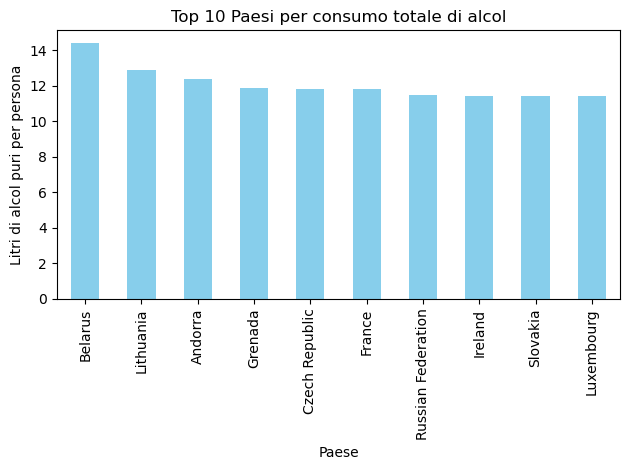

In [7]:
# Importo la libreria
import matplotlib.pyplot as plt

# Bar chart dei 10 paesi con più consumo totale
top_10_alcol.plot(kind='bar', x='country', y='total_litres_of_pure_alcohol', legend=False, color='skyblue')
plt.title('Top 10 Paesi per consumo totale di alcol')
plt.xlabel('Paese')
plt.ylabel('Litri di alcol puri per persona')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

PUNTO 7: CREARE UN PLOT LINE CON wine_serving ORDINATO PER PAESE

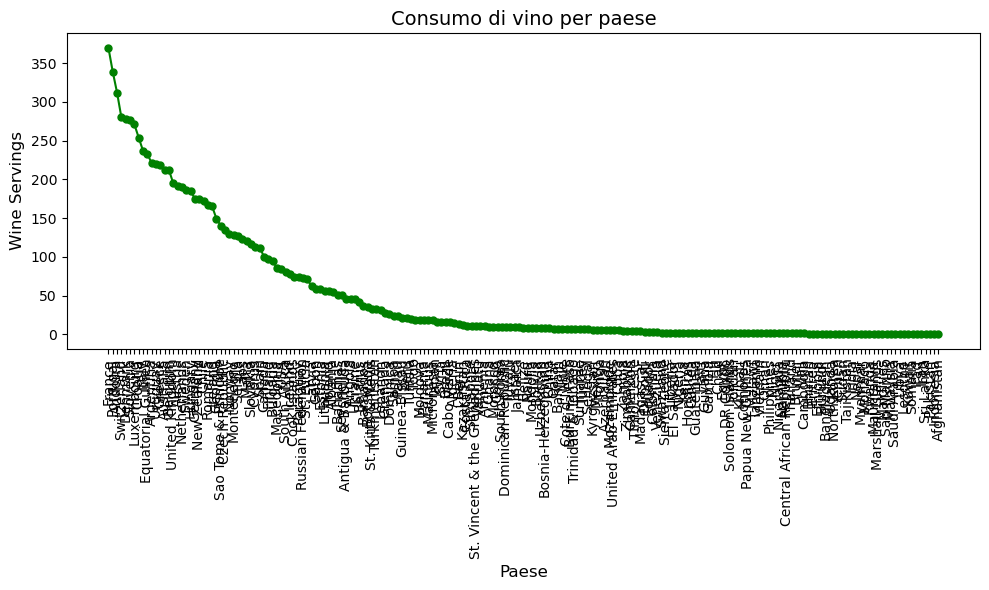

In [12]:
# Ordino i paesi per consumo di vino
df_sorted_wine = df.sort_values(by='wine_servings', ascending=False)

# Creo un line plot con miglioramenti
plt.figure(figsize=(10, 6))  # Aumenta la dimensione del grafico per renderlo più leggibile
plt.plot(df_sorted_wine['country'], df_sorted_wine['wine_servings'], marker='o', color='green', linestyle='-', markersize=5)

# Aggiungo un titolo e etichette agli assi
plt.title('Consumo di vino per paese', fontsize=14)
plt.xlabel('Paese', fontsize=12)
plt.ylabel('Wine Servings', fontsize=12)

# Ruoto le etichette dell'asse x per evitare sovrapposizioni
plt.xticks(rotation=90)

# Aggiungo un layout compatto per evitare sovrapposizioni
plt.tight_layout()

# Visualizzo il grafico
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])